# Thông tin
19521216 - Trần Huỳnh Kỳ Anh

28-09-2021


#**Cài đặt thư viện và clone git**

In [1]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium

!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas

     |████████████████████████████████| 13.1 MB 114 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 994 kB 10.4 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 6.3 MB 59.4 MB/s 
     |████████████████████████████████| 994 kB 8.0 MB/s 
     |████████████████████████████████| 1.8 MB 6.9 MB/s 


In [2]:
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 1930 (delta 309), reused 500 (delta 270), pack-reused 1340
Receiving objects: 100% (1930/1930), 178.53 MiB | 24.60 MiB/s, done.
Resolving deltas: 100% (986/986), done.
Checking out files: 100% (542/542), done.


In [4]:
!git clone https://github.com/tranhuynhkyanh/CS116

Cloning into 'CS116'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


#**Bước 3: Load ranh giới quận/ huyện**

In [5]:
import geopandas as gpd
sharpfile_path = "/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp"
data = gpd.read_file(sharpfile_path)
data.crs

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
import folium
data = data.to_crs(epsg=4326)
m = folium.Map(location=[11.2, 107], zoom_start=10, tiles='CartoDB positron')
for _, r in data.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

#**Bước 4: Load dữ liệu click người dùng và đọc file json**

In [6]:
json_data = gpd.read_file("/content/CS116/response3.json")

In [7]:
user_data = json_data.to_crs(epsg=32648)

In [8]:
user_data

,dbh,geometry
0,1,POINT (687074.226 1200044.747)
1,1,POINT (687752.360 1188252.815)
2,1,POINT (681813.990 1197998.313)
3,1,POINT (681761.573 1198052.679)
4,1,POINT (681442.508 1198483.069)
...,...,...
83670,1,POINT (681095.997 1199156.208)
83671,1,POINT (691495.565 1200249.907)
83672,1,POINT (689394.818 1186828.972)
83673,1,POINT (683268.233 1197009.824)


In [18]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import numpy as np


#**Bước 5: Lấy ra top 10 quận có tốc độ tăng dân số lớn nhất**

In [10]:
data.insert(10,"Pop_Growth",data["Pop_2019"]/data["Pop_2017"])
data.head(5)

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_Growth,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,0.675244,208475.0,211220.0,142625.0,23360.40,24294.90,24292.90,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,0.956202,198104.0,199095.0,190375.0,38688.60,38362.10,38704.40,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,0.953424,186995.0,183894.0,175329.0,43311.10,43857.00,44204.00,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,0.888886,260742.0,262757.0,233561.0,34910.50,35490.80,35594.20,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,1.100641,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."


In [11]:
data_pop_growth = data.nlargest(10,"Pop_Growth")

In [12]:
data_pop_growth[["Dist_Name","Pop_Growth"]]

,Dist_Name,Pop_Growth
16,District 9,1.277619
23,Hoc Mon,1.215639
18,Nha Be,1.162071
22,District 12,1.129460
17,District 2,1.113104
13,Cu Chi,1.103646
4,District 7,1.100641
15,Thu Duc,1.092283
14,Binh Chanh,1.080576
12,Binh Tan,1.075143


In [13]:
data_pop_name = data_pop_growth['Dist_Name']
data_pop_name = data_pop_name.to_string(index=False)
data_pop_name = data_pop_name.split('\n')
data_pop_name




['  District 9',
 '     Hoc Mon',
 '      Nha Be',
 ' District 12',
 '  District 2',
 '      Cu Chi',
 '  District 7',
 '     Thu Duc',
 '  Binh Chanh',
 '    Binh Tan']

#**Bước 6: Lọc các điểm click theo top 10 quận huyện này**

In [14]:
# Spatial join
data_pop_growth = data_pop_growth.to_crs(32648)
df_extract = gpd.sjoin(user_data,data_pop_growth)


In [15]:
df_extract

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_Growth,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area
0,1,POINT (687074.226 1200044.747),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,1.092283,537050.0,542612.0,592686.0,9259.21,9546.55,10028.2,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.90,52828.501430,4.775581e+07
5,1,POINT (691440.136 1200531.193),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,1.092283,537050.0,542612.0,592686.0,9259.21,9546.55,10028.2,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.90,52828.501430,4.775581e+07
11,1,POINT (691905.913 1199797.739),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,1.092283,537050.0,542612.0,592686.0,9259.21,9546.55,10028.2,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.90,52828.501430,4.775581e+07
12,1,POINT (691947.773 1199339.827),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,1.092283,537050.0,542612.0,592686.0,9259.21,9546.55,10028.2,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.90,52828.501430,4.775581e+07
13,1,POINT (691510.499 1200207.738),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,1.092283,537050.0,542612.0,592686.0,9259.21,9546.55,10028.2,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.90,52828.501430,4.775581e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77637,1,POINT (684294.584 1186634.720),14,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,1.080576,623022.0,652900.0,705508.0,1660.96,1768.42,1856.3,1944.79,2033.12,2180.61,2338.38,2463.2,2581.33,2789.32,129933.645113,2.529152e+08
78174,1,POINT (683684.190 1186844.475),14,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,1.080576,623022.0,652900.0,705508.0,1660.96,1768.42,1856.3,1944.79,2033.12,2180.61,2338.38,2463.2,2581.33,2789.32,129933.645113,2.529152e+08
79984,1,POINT (683579.834 1186834.975),14,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,1.080576,623022.0,652900.0,705508.0,1660.96,1768.42,1856.3,1944.79,2033.12,2180.61,2338.38,2463.2,2581.33,2789.32,129933.645113,2.529152e+08
81459,1,POINT (678721.460 1179200.303),14,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,1.080576,623022.0,652900.0,705508.0,1660.96,1768.42,1856.3,1944.79,2033.12,2180.61,2338.38,2463.2,2581.33,2789.32,129933.645113,2.529152e+08


In [16]:
# Tạo data click với từng quận
click_data = []
for district in range(0,10):
  click_data.append(df_extract[df_extract['Dist_Name'] == " ".join(data_pop_name[district].split())])
click_data[0]

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_Growth,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area
222,1,POINT (692922.233 1197659.444),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,1.277619,296198.0,310739.0,397006.0,2242.76,2306.02,2376.49,2419.33,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08
429,1,POINT (695991.169 1192822.430),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,1.277619,296198.0,310739.0,397006.0,2242.76,2306.02,2376.49,2419.33,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08
1316,1,POINT (698836.877 1192704.024),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,1.277619,296198.0,310739.0,397006.0,2242.76,2306.02,2376.49,2419.33,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08
1381,1,POINT (692913.762 1197663.315),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,1.277619,296198.0,310739.0,397006.0,2242.76,2306.02,2376.49,2419.33,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08
2129,1,POINT (698955.307 1193250.694),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,1.277619,296198.0,310739.0,397006.0,2242.76,2306.02,2376.49,2419.33,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81983,1,POINT (701841.824 1203175.800),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,1.277619,296198.0,310739.0,397006.0,2242.76,2306.02,2376.49,2419.33,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08
82069,1,POINT (694885.523 1197454.318),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,1.277619,296198.0,310739.0,397006.0,2242.76,2306.02,2376.49,2419.33,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08
82657,1,POINT (697455.530 1199372.342),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,1.277619,296198.0,310739.0,397006.0,2242.76,2306.02,2376.49,2419.33,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08
83095,1,POINT (700309.979 1199276.144),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,1.277619,296198.0,310739.0,397006.0,2242.76,2306.02,2376.49,2419.33,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08


#**Bước 7: Chạy thuật toán gom nhóm K-Means với K = 20**

In [19]:
# Tạo mảng vị trí click chuột theo từng quận
click_district1 = []
for dist in click_data:
  data_numpy = dist['geometry'].to_numpy()
  data_numpy
  Arr = []
  for point in data_numpy:
    Arr.append([point.x,point.y])
  Arr = np.array(Arr)
  click_district1.append(Arr)

In [20]:
# Chạy kmeans trên từng quận


from sklearn import cluster

kmean_click = []
for cd in click_district1:
  kmeans = cluster.KMeans(n_clusters=20)
  k5cls = kmeans.fit(cd)
  kmean_click.append(k5cls)

#**Bước 8: Lấy ra cụm điểm click gom nhóm nhiều nhất của mỗi quận/huyện**

In [21]:
#Tìm klabels lớn nhất trong mỗi quận
max_count_label = []
for i in range(10):
  kmean_click[i].labels_
  unique, counts = np.unique(kmean_click[i].labels_, return_counts=True)
  count_label = dict(zip(unique, counts))
  max_count_label.append(max(count_label, key=count_label.get))

In [22]:
max_count_label

[3, 4, 6, 2, 2, 0, 3, 18, 14, 13]

In [23]:
# Thêm cột klabels

for i in range(10):
  click_data[i]['k5cls'] = kmean_click[i].labels_

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [24]:
data_label_max = []

for i in range(10):
  tmp = click_data[i].loc[click_data[i]['k5cls'] == max_count_label[i]]
  data_label_max.append(tmp)

In [25]:
data_label_max[1].crs

<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#**Bước 9: Vẽ biểu đồ heatmap với thư viện folium các cụm điểm lớn nhất theo từng quận/huyện này**

In [28]:
from folium import plugins
#m = folium.Map(location=[10.8, 106.7], zoom_start=10, tiles='CartoDB positron')
for i in range(10):
  data_label_max[i] = data_label_max[i].to_crs(4326)
  heat_data = [[point.xy[1][0], point.xy[0][0]] for point in data_label_max[i]['geometry']]
  heat_data
  plugins.HeatMap(heat_data).add_to(m)
m

#**Bước 10: Save png**

In [29]:
m.save('map.html')

In [33]:
#Ref : https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)



Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [49]:
wd.set_window_size(1690 ,1280)  # choose a resolution
wd.get('file:///content/map.html')

wd.save_screenshot('map.png')

True

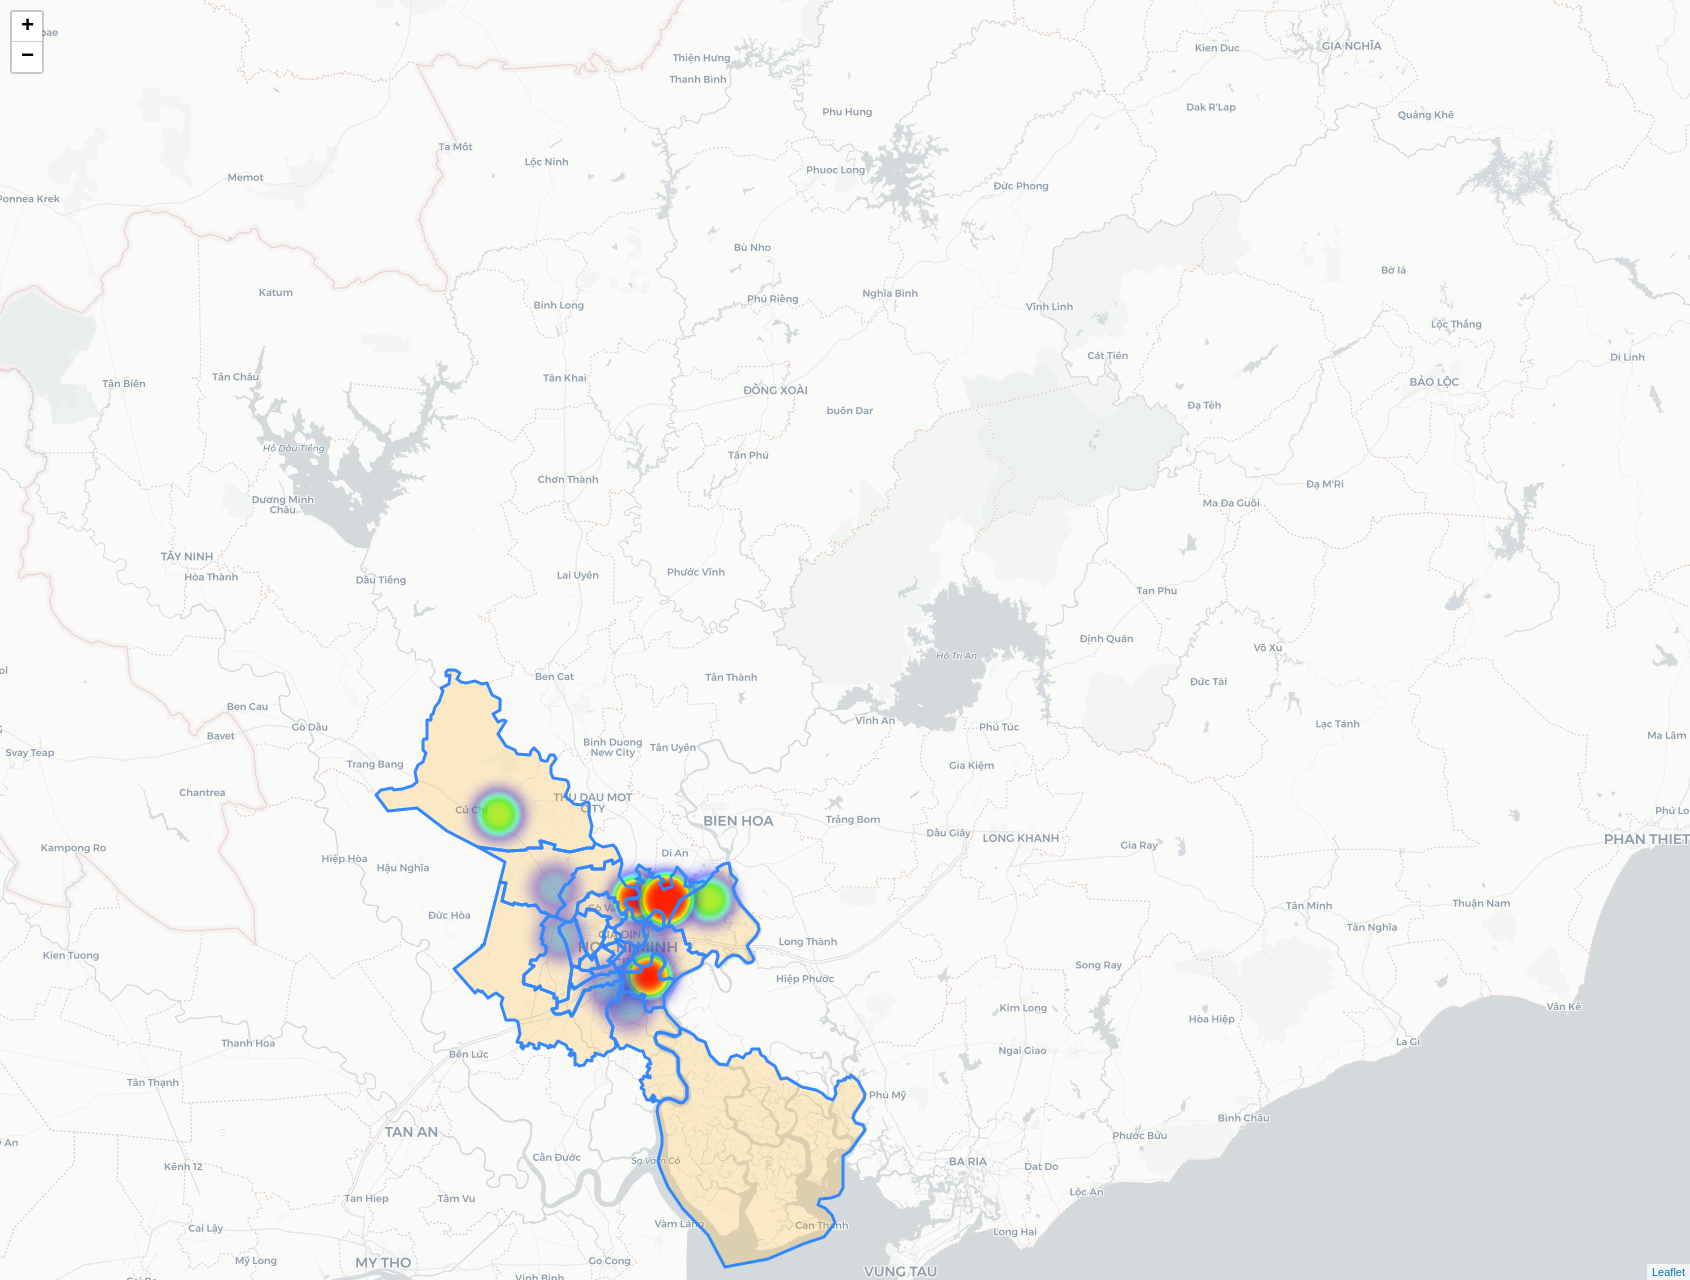

In [51]:
import cv2 as cv
map_png = cv.imread('/content/map.png')
from google.colab.patches import cv2_imshow
cv2_imshow(map_png)